<a href="https://colab.research.google.com/github/Francisco2963/Algoritmo-K-means-Core-/blob/main/Algoritmo_K_means_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from sklearn.cluster import KMeans

In [87]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
df.duplicated().sum()

0

In [91]:
# Seleccionar las variables
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [92]:
# Implementar el algoritmo K-means con diferentes valores de K

sse = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

sse.append(kmeans.inertia_) almacena la inercia de cada modelo K-means ajustado con un valor diferente de
𝑘
k. Esto permite graficar el método del codo y elegir el número óptimo de clusters

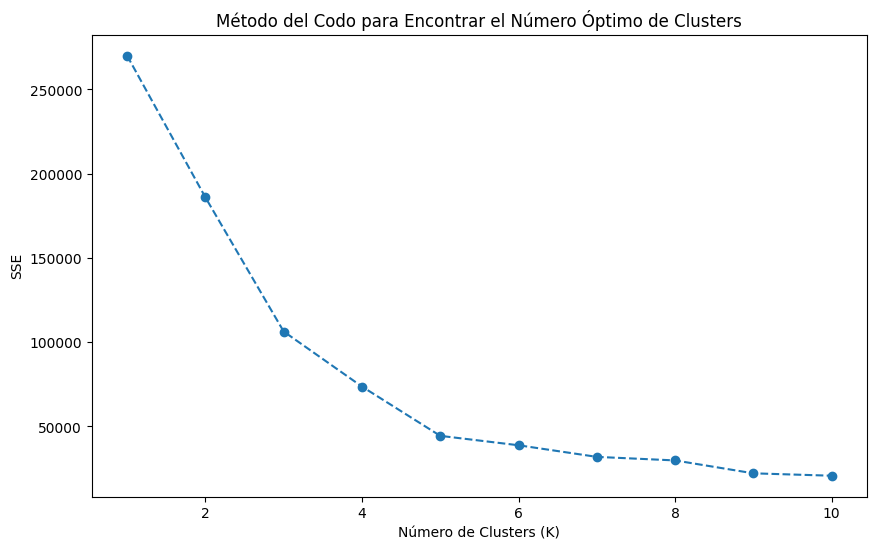

In [93]:
# Graficar el método del codo (Elbow Method) para identificar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
plt.show()

In [95]:
# De acuerdo al gráfico del codo, un buen valor de K seria 4
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
clusters = kmeans.fit_predict(X)

In [96]:
# Añadir la columna con el cluster asignado al dataframe original
df['Cluster'] = clusters

In [97]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


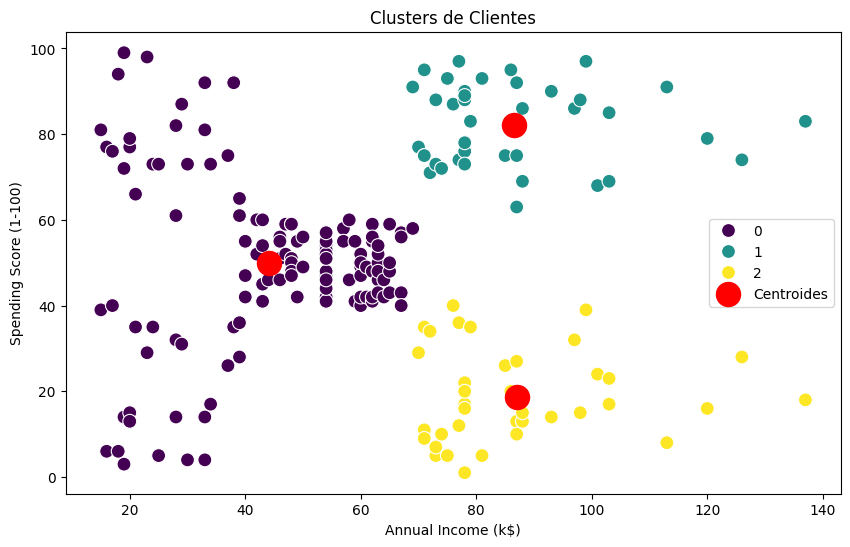

In [98]:
# Visualización de los clusters usando un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [99]:
# Interpretación de los clusters: descripción estadística de cada cluster
cluster_analisis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analisis)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 44.154472               49.829268
1                 86.538462               82.128205
2                 87.000000               18.631579


In [100]:
# De acuerdo al gráfico del codo, un buen valor de K seria 5
k_optimo_1 = 5
kmeans_1 = KMeans(n_clusters=k_optimo_1, random_state=0)
clusters_1 = kmeans_1.fit_predict(X)

In [101]:
df['Cluster_1'] = clusters_1

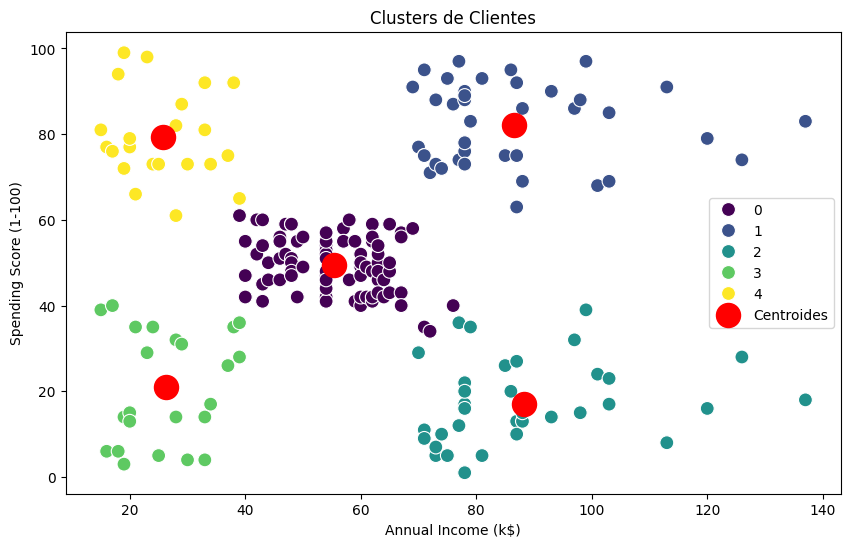

In [102]:
# Visualización de los clusters usando un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_1', palette='viridis', s=100)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [103]:
# Interpretación de los clusters: descripción estadística de cada cluster
cluster_analisis_2 = df.groupby('Cluster_1')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analisis_2)

           Annual Income (k$)  Spending Score (1-100)
Cluster_1                                            
0                   55.296296               49.518519
1                   86.538462               82.128205
2                   88.200000               17.114286
3                   26.304348               20.913043
4                   25.727273               79.363636


COMENTARIO

Cluster 0:

Ingreso Anual Promedio: 55.3k$

Puntaje de Gasto Promedio: 49.5

Este grupo de clientes tiene un ingreso anual medio y un puntaje de gasto intermedio, por lo que podrían considerarse clientes con un comportamiento de compra moderado, tanto en ingresos como en gastos.

Cluster 1:

Ingreso Anual Promedio: 86.5k$

Puntaje de Gasto Promedio: 82.1

Los clientes en este cluster tienen ingresos altos y un puntaje de gasto alto. Probablemente, estos clientes son grandes compradores con un alto nivel adquisitivo y tienden a gastar mucho.

 Este segmento puede ser ideal para promociones exclusivas y productos de lujo.

Cluster 2:

Ingreso Anual Promedio: 88.2k$

Puntaje de Gasto Promedio: 17.1

Aunque estos clientes tienen ingresos altos, su puntaje de gasto es bajo. Podría interpretarse que son clientes con alta capacidad de compra, pero que no suelen gastar mucho.

Pueden necesitar incentivos para gastar más o se inclinan por productos de alto valor.

Cluster 3:

Ingreso Anual Promedio: 26.3k$

Puntaje de Gasto Promedio: 20.9

Este grupo tiene ingresos bajos y también un bajo puntaje de gasto. Son clientes que probablemente tienen un presupuesto limitado y gastan poco.

 Estrategias de descuentos o promociones podrían funcionar bien para atraer a estos clientes.

Cluster 4:

Ingreso Anual Promedio: 25.7k$

Puntaje de Gasto Promedio: 79.4

A pesar de que estos clientes tienen ingresos bajos, su puntaje de gasto es alto. Son personas que, aunque tienen menor capacidad adquisitiva, tienden a gastar más.

Estrategias para fidelizar a estos clientes y ofrecerles productos que se ajusten a su capacidad de pago podrían ser útiles.

Conclusión del Análisis

Cada cluster representa un perfil de cliente distinto, basándose en su comportamiento de gasto e ingresos anuales. Estos insights te permiten personalizar estrategias de marketing, por ejemplo:

Cluster 1: Enfocar productos de lujo y promociones exclusivas.

Cluster 2: Incentivar el gasto con promociones o productos que se ajusten a sus intereses.

Cluster 3: Aplicar descuentos para atraer a clientes con menor poder adquisitivo.

Cluster 4: Ofrecer productos asequibles con alto valor percibido para aumentar la satisfacción y fidelidad.

# COMENTARIO FINAL DE CLUSTER

Al agrupar con 5 cluster (mejor agrupamiento segun el codo), la agrupacion de los cluster es mucho mejor, ya que los clientes se agrupan de mejor manera alrededor de los centroides a diferecia de la agrupacion con 3 cluster donde la dispercion de los clientes es mucho mayor y no hay una clara definicion del tipo de cliente que podria ser, ya que los ingresos altos se mantienen, pero agrupa los ingresos mas bajos en un solo cluster.